<a href="https://colab.research.google.com/github/jonitorta/Ejercicios_Machine_learning./blob/main/Space_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Pandas version: 1.3.5
Numpy version: 1.21.6


In [90]:
#Plot config
%matplotlib inline
sns.set_style('white')

In [21]:
#Files paths
train_path = "/content/train.csv"
test_path = "/content/test.csv"

# **Data correcting, compling, creating and completing.**


In [85]:
#Create DataFrames for both files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
both_df = [train_df, test_df]
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [23]:
#Let's see attributes of data
print(train_df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [24]:
#See data size
print("Train size : {}\nTest size : {}".format(train_df.shape,test_df.shape))

Train size : (8693, 14)
Test size : (4277, 13)


In [25]:
#Check general info of both files
print(train_df.info())
print("-"*40)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13

In [30]:
#We have some null in every column, fill methodology will be importat
print("Train set")
print(train_df.isnull().sum())
print("-"*40)
print("Test set")
print(test_df.isnull().sum())

Train set
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------------------------------------
Test set
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [98]:
#Check more info of train set
#Avg age is almost 30
#In every spend attr a lot of people spent almost 0 and some spent a lot
num_attr = "Age RoomService FoodCourt ShoppingMall Spa VRDeck".split(" ")
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


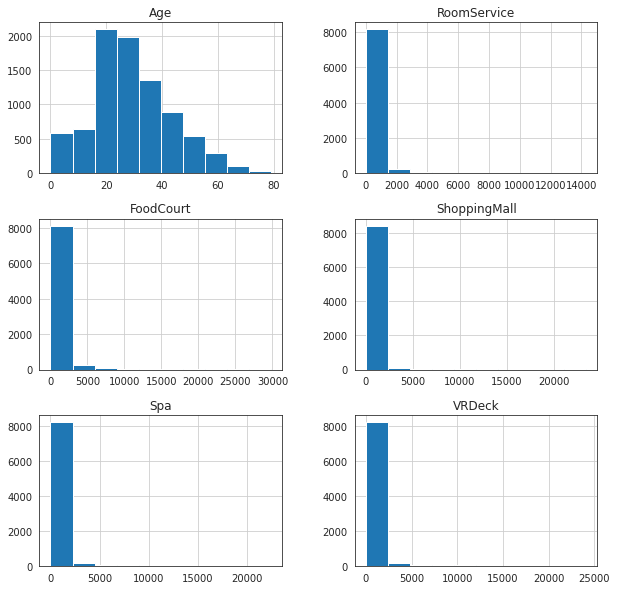

In [102]:
#Here we can easly see how a few people spent a lot and the mayority spend almost 0.
train_df[num_attr].hist(figsize = (10,10))
plt.show()

In [103]:
#Lets bands for age and spend in each cat, we could create a total spend and drop other cols but there a some null in each so
#for now let's create bands for each.
#In this part i will do the same, create a band for a cat, see how target var relates to the band and drop the band
#with this info I can make assumptions and decide if create a band attr and drop the original col.
def interval_attr_relation(name, cuts):
  #Given a list of names and number of cuts returns % of transport chance for each cat.
  pass

In [31]:
#Some repeated names
#3 different planets
#Most people had unique cabin
#3 different destinantion
train_df.describe(include=["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [79]:
#Let's check how cattegorical attributes affect target one (Transported)
#As we can see Cryosleep seems really importat 
interesting_attr = "HomePlanet CryoSleep Destination VIP".split(" ")
for attr in interesting_attr:
  print(train_df[["Transported",attr]].groupby(attr).mean())

            Transported
HomePlanet             
Earth          0.423946
Europa         0.658846
Mars           0.523024
           Transported
CryoSleep             
False         0.328921
True          0.817583
               Transported
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175
       Transported
VIP               
False     0.506332
True      0.381910


In [80]:
#In the data description some attr have hiden info let's extract it
#For example PassengerId is of the form gggg_pp where gggg indicates group and
#pp number of people in group we can extract each in different columns and drop 
#passengerid, REMEMBER passid has not nulls so we can do this before filling nulls.
train_df[["Group","PeopleGroup"]] =  train_df["PassengerId"].str.split("_", expand = True)
train_df.drop("PassengerId", axis = 1, inplace = True)
train_df.head(1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,PeopleGroup
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01


In [81]:
#Do the same for test 
test_df[["Group","PeopleGroup"]] =  test_df["PassengerId"].str.split("_", expand = True)
test_df.drop("PassengerId", axis = 1, inplace = True)